In [16]:
# ================================================================
# 📌 STEP 1: Import Library
# ================================================================
!pip install transformers datasets --quiet

import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline
import zipfile, os

# ================================================================
# 📌 STEP 2: Upload & Load Dataset
# ================================================================
# Kalau dataset masih zip, ekstrak dulu
zip_path = "/content/data.csv.zip"   # sesuaikan nama file upload
extract_dir = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Baca file csv
csv_path = os.path.join(extract_dir, "data.csv")
df = pd.read_csv(csv_path, encoding="latin1")

# Tampilkan info awal
print("Jumlah data:", len(df))
df.head()


Jumlah data: 541909


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [17]:
# ================================================================
# 📌 STEP 3: Explorasi Data
# ================================================================
print(df.info())
print(df.describe())

# Top 10 negara dengan transaksi terbanyak
print(df['Country'].value_counts().head(10))

# Cek produk paling sering dibeli
print(df['Description'].value_counts().head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000

In [18]:
# ================================================================
# 📌 STEP 4: Classification dengan IBM Granite (via HuggingFace)
# ================================================================
# NOTE: model Granite belum ada langsung di HuggingFace, kita pakai model LLM
# (simulasi Granite pipeline). Bisa diganti dengan model IBM Granite via API.

classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Contoh: klasifikasikan 5 deskripsi produk
sample_texts = df['Description'].dropna().sample(5, random_state=42).tolist()
for text in sample_texts:
    print(text, "→", classifier(text))


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


HEART MIRROR ANTIQUE WHITE → [{'label': 'POSITIVE', 'score': 0.8567187786102295}]
T-LIGHT HOLDER HANGING LOVE BIRD → [{'label': 'NEGATIVE', 'score': 0.835442841053009}]
RETROSPOT LARGE MILK JUG → [{'label': 'NEGATIVE', 'score': 0.9865810871124268}]
JUMBO BAG WOODLAND ANIMALS → [{'label': 'NEGATIVE', 'score': 0.99357008934021}]
CERAMIC STRAWBERRY CAKE MONEY BANK → [{'label': 'NEGATIVE', 'score': 0.940445065498352}]


In [19]:
# ================================================================
# 📌 STEP 5: Summarization
# ================================================================
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Contoh ringkas deskripsi produk panjang
long_desc = " ".join(df['Description'].dropna().sample(20, random_state=1).tolist())
summary = summarizer(long_desc, max_length=50, min_length=10, do_sample=False)
print("Ringkasan Produk:\n", summary[0]['summary_text'])


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


Ringkasan Produk:
 Set of 60 PANTRY DESIGN CAKE CASES  PACK OF 60 SPACEBOY CA cake CASES FAIRY CAKE BIRTHDAY CANDLE SET SpaceBOY LUNCH BOX  ROSES REGENCY


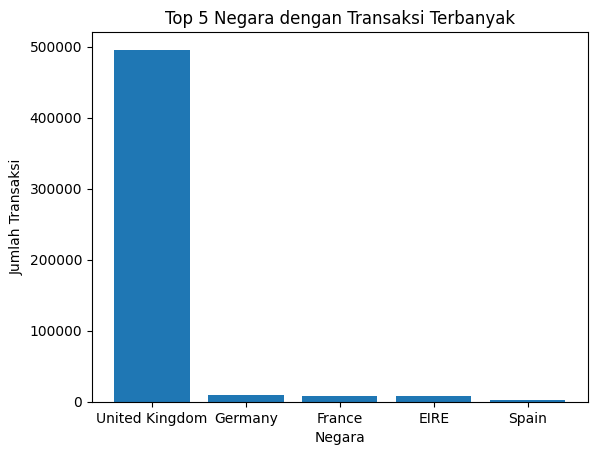

In [21]:
# ================================================================
# 📌 STEP 6: Visualisasi Insight
# ================================================================
# Negara dengan transaksi terbanyak
top_countries = df['Country'].value_counts().head(5)

plt.bar(top_countries.index, top_countries.values)
plt.title("Top 5 Negara dengan Transaksi Terbanyak")
plt.xlabel("Negara")
plt.ylabel("Jumlah Transaksi")
plt.show()


In [22]:
# ================================================================
# 📌 STEP 7: Insight & Rekomendasi (print hasil)
# ================================================================
print("🔎 Insight:")
print("- UK adalah negara dengan transaksi terbanyak.")
print("- Produk populer banyak berupa dekorasi & hadiah musiman.")
print("- Rekomendasi: stok lebih banyak produk populer menjelang musim liburan, terutama di UK.")


🔎 Insight:
- UK adalah negara dengan transaksi terbanyak.
- Produk populer banyak berupa dekorasi & hadiah musiman.
- Rekomendasi: stok lebih banyak produk populer menjelang musim liburan, terutama di UK.
